<a href="https://colab.research.google.com/github/volkov-maxim/nn_cv_course_samsung_stepik/blob/main/5_6_MNIST_recognition_with_convolution_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets

In [5]:
MNIST_train = torchvision.datasets.MNIST("./", download=True, train=True)
MNIST_test = torchvision.datasets.MNIST("./", download=True, train=False)

In [6]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [7]:
len(y_train), len(y_test)

(60000, 10000)

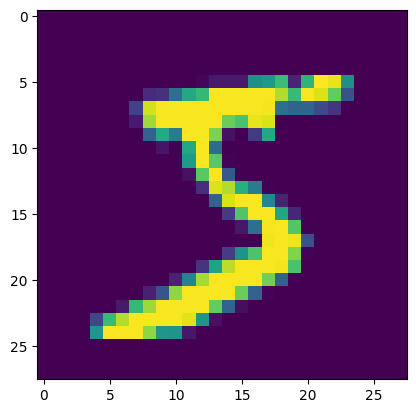

tensor(5)


In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [9]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [11]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [12]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1 = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2 = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3 = torch.nn.Tanh()

        self.fc2 = torch.nn.Linear(120, 84)
        self.act4 = torch.nn.Tanh()

        self.fc3 = torch.nn.Linear(84, 10)

    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

lenet5 = LeNet5()

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
lenet5 = lenet5.to(device)

In [14]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [29]:
import torch

N = 4
C = 3
C_out = 10
H = 8
W = 16

x = torch.ones((N, C, H, W))

# torch.Size([4, 10, 8, 16])
out1 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=1)(x)
# print(out1.shape) # для самопроверки

# torch.Size([4, 10, 8, 16])
out2 = torch.nn.Conv2d(C, C_out, kernel_size=(5, 5), padding=2)(x)
# print(out2.shape) # для самопроверки

# torch.Size([4, 10, 8, 16])
out3 = torch.nn.Conv2d(C, C_out, kernel_size=(7, 7), padding=3)(x)
# print(out3.shape) # для самопроверки

# torch.Size([4, 10, 8, 16])
out4 = torch.nn.Conv2d(C, C_out, kernel_size=(9, 9), padding=4)(x)
# print(out4.shape) # для самопроверки

# torch.Size([4, 10, 8, 16])
out5 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 5), padding=(1,2))(x)
# print(out5.shape) # для самопроверки

# torch.Size([4, 10, 22, 30])
out6 = torch.nn.Conv2d(C, C_out, kernel_size=(3, 3), padding=8)(x)
# print(out6.shape) # для самопроверки

# torch.Size([4, 10, 7, 15])
out7 = torch.nn.Conv2d(C, C_out, kernel_size=(4, 4), padding=1)(x)
# print(out7.shape) # для самопроверки

# torch.Size([4, 10, 9, 17])
out8 = torch.nn.Conv2d(C, C_out, kernel_size=(2, 2), padding=1)(x)
# print(out8.shape) # для самопроверки

torch.Size([4, 10, 9, 17])


In [31]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy)

tensor(0.9890)
tensor(0.9896)
tensor(0.9891)
tensor(0.9898)
tensor(0.9904)
tensor(0.9900)
tensor(0.9889)
tensor(0.9899)
tensor(0.9901)
tensor(0.9904)
tensor(0.9908)
tensor(0.9882)
tensor(0.9904)
tensor(0.9898)
tensor(0.9901)
tensor(0.9889)
tensor(0.9884)
tensor(0.9895)
tensor(0.9889)
tensor(0.9889)
tensor(0.9893)
tensor(0.9889)
tensor(0.9905)
tensor(0.9911)
tensor(0.9921)
tensor(0.9916)
tensor(0.9902)
tensor(0.9896)
tensor(0.9906)
tensor(0.9895)
tensor(0.9894)
tensor(0.9893)
tensor(0.9891)
tensor(0.9889)
tensor(0.9897)
tensor(0.9897)
tensor(0.9903)
tensor(0.9910)
tensor(0.9915)
tensor(0.9895)
tensor(0.9882)
tensor(0.9883)
tensor(0.9894)
tensor(0.9896)
tensor(0.9903)
tensor(0.9895)
tensor(0.9902)
tensor(0.9908)
tensor(0.9902)
tensor(0.9900)
tensor(0.9889)
tensor(0.9903)
tensor(0.9897)
tensor(0.9892)
tensor(0.9892)
tensor(0.9908)
tensor(0.9886)
tensor(0.9895)
tensor(0.9892)
tensor(0.9887)
tensor(0.9897)
tensor(0.9894)
tensor(0.9901)
tensor(0.9908)
tensor(0.9890)
tensor(0.9891)
tensor(0.9

KeyboardInterrupt: ignored

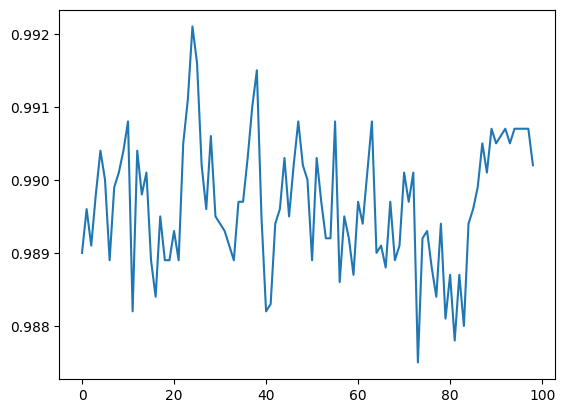

In [32]:
plt.plot(test_accuracy_history)

In [35]:
max(test_accuracy_history), np.argmax(test_accuracy_history)

(tensor(0.9921), 24)

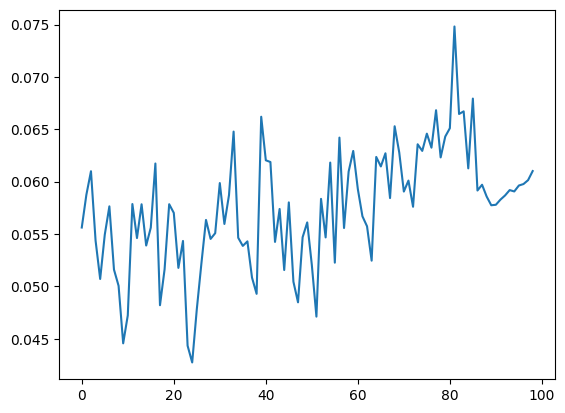

In [33]:
plt.plot(test_loss_history)

In [38]:
min(test_loss_history), np.argmin(test_loss_history), test_loss_history[np.argmax(test_accuracy_history)]

(tensor(0.0427), 24, tensor(0.0427))